# FIFA Case Study - Player Recommendation System

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FIFA-Case-Study---Player-Recommendation-System" data-toc-modified-id="FIFA-Case-Study---Player-Recommendation-System-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>FIFA Case Study - Player Recommendation System</a></span></li><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Modules</a></span></li><li><span><a href="#Data-Cleaning-🧽🪣" data-toc-modified-id="Data-Cleaning-🧽🪣-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning 🧽🪣</a></span></li><li><span><a href="#Data-Inspection-📊📈🔍" data-toc-modified-id="Data-Inspection-📊📈🔍-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Inspection 📊📈🔍</a></span><ul class="toc-item"><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li></ul></li><li><span><a href="#Standardising-the-values" data-toc-modified-id="Standardising-the-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Standardising the values</a></span></li><li><span><a href="#Fit-the-Nearest-Neighbours-model" data-toc-modified-id="Fit-the-Nearest-Neighbours-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fit the Nearest Neighbours model</a></span></li><li><span><a href="#Testing-the-model-to-generate-predictions" data-toc-modified-id="Testing-the-model-to-generate-predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Testing the model to generate predictions</a></span><ul class="toc-item"><li><span><a href="#Finding-the-closest-player-to-your-search-target" data-toc-modified-id="Finding-the-closest-player-to-your-search-target-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Finding the closest player to your search target</a></span></li><li><span><a href="#Finding-the-closest-player-within-a-team" data-toc-modified-id="Finding-the-closest-player-within-a-team-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Finding the closest player within a team</a></span></li></ul></li></ul></div>

# Import Modules

In [1]:
#Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML
import pickle

#pandas options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [2]:
url = 'https://raw.githubusercontent.com/dbpwood/Imperial/main/FIFA_players_21.csv'
# original data source https://www.kaggle.com/datasets/stefanoleone992/fifa-21-complete-player-dataset

df = pd.read_csv(url)
df.head()

sofifa_id  \
0     158023   
1      20801   
2     200389   
3     188545   
4     190871   

                                                           player_url  \
0                https://sofifa.com/player/158023/lionel-messi/210002   
1  https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210002   
2                   https://sofifa.com/player/200389/jan-oblak/210002   
3          https://sofifa.com/player/188545/robert-lewandowski/210002   
4   https://sofifa.com/player/190871/neymar-da-silva-santos-jr/210002   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  66+3  65+3   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        188         87    Slovenia      Atlético Madrid  ...  32+3  36+3   
3        184         80      Poland    FC Bayern München  ...  64+3  65+3   
4        175         68      Brazil  Paris Saint-Germain  ...  67+3  62+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  65+3  65+3  66+3  62+3  52+3  52+3  52+3  62+3  
1  61+3  61+3  65+3  61+3  54+3  54+3  54+3  61+3  
2  36+3  36+3  32+3  32+3  33+3  33+3  33+3  32+3  
3  65+3  65+3  64+3  61+3  60+3  60+3  60+3  61+3  
4  62+3  62+3  67+3  62+3  49+3  49+3  49+3  62+3  

[5 rows x 106 columns]

**Dataset size (no. rows, no. columns)**

In [3]:
df.shape

(18944, 106)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


In [5]:
df['sofifa_id'].nunique()

18944

# Data Cleaning 🧽🪣

**Consolidating player positions to one main position**

In [6]:
# df.loc[:, 'main_position'] = df['player_positions'].map(lambda x: x[0:3])
df.insert(16, 'main_position', df['player_positions'].map(lambda x: x[0:3]))
df.head()

sofifa_id  \
0     158023   
1      20801   
2     200389   
3     188545   
4     190871   

                                                           player_url  \
0                https://sofifa.com/player/158023/lionel-messi/210002   
1  https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210002   
2                   https://sofifa.com/player/200389/jan-oblak/210002   
3          https://sofifa.com/player/188545/robert-lewandowski/210002   
4   https://sofifa.com/player/190871/neymar-da-silva-santos-jr/210002   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  66+3  65+3   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        188         87    Slovenia      Atlético Madrid  ...  32+3  36+3   
3        184         80      Poland    FC Bayern München  ...  64+3  65+3   
4        175         68      Brazil  Paris Saint-Germain  ...  67+3  62+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  65+3  65+3  66+3  62+3  52+3  52+3  52+3  62+3  
1  61+3  61+3  65+3  61+3  54+3  54+3  54+3  61+3  
2  36+3  36+3  32+3  32+3  33+3  33+3  33+3  32+3  
3  65+3  65+3  64+3  61+3  60+3  60+3  60+3  61+3  
4  62+3  62+3  67+3  62+3  49+3  49+3  49+3  62+3  

[5 rows x 107 columns]

In [7]:
df['main_position'].head()

0    RW,
1    ST,
2     GK
3     ST
4    LW,
Name: main_position, dtype: object

In [8]:
df['main_position'] = df['main_position'].str.replace(',', '')
df['main_position'].head()

0    RW
1    ST
2    GK
3    ST
4    LW
Name: main_position, dtype: object

In [9]:
print(df.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'main_position', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactio

**Drop unwanted columns that will not be needed for our model**

In [10]:
drop_cols = ['player_positions', 'body_type', 'real_face', 'player_tags', 'team_position', 'loaned_from',
             'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'player_traits',
             'defending_marking', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 
             'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [11]:
df = df.drop(columns = drop_cols)
df.shape

(18944, 69)

In [12]:
df.head()

sofifa_id  \
0     158023   
1      20801   
2     200389   
3     188545   
4     190871   

                                                           player_url  \
0                https://sofifa.com/player/158023/lionel-messi/210002   
1  https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210002   
2                   https://sofifa.com/player/200389/jan-oblak/210002   
3          https://sofifa.com/player/188545/robert-lewandowski/210002   
4   https://sofifa.com/player/190871/neymar-da-silva-santos-jr/210002   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...  \
0        170         72   Argentina         FC Barcelona  ...   
1        187         83    Portugal             Juventus  ...   
2        188         87    Slovenia      Atlético Madrid  ...   
3        184         80      Poland    FC Bayern München  ...   
4        175         68      Brazil  Paris Saint-Germain  ...   

  mentality_vision  mentality_penalties  mentality_composure  \
0               95                   75                   96   
1               82                   84                   95   
2               65                   11                   68   
3               79                   88                   88   
4               90                   92                   93   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         35                        24                   6   
1                         32                        24                   7   
2                         12                        18                  87   
3                         42                        19                  15   
4                         30                        29                   9   

  goalkeeping_handling goalkeeping_kicking  goalkeeping_positioning  \
0                   11                  15                       14   
1                   11                  15                       14   
2                   92                  78                       90   
3                    6                  12                        8   
4                    9                  15                       15   

   goalkeeping_reflexes  
0                     8  
1                    11  
2                    90  
3                    10  
4                    11  

[5 rows x 69 columns]

**Identifying missing values in our data and treating them appropriately**

In [13]:
df.isna().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
main_position                     0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
release_clause_eur              995
team_jersey_number              225
pace                           2083
shooting                       2083
passing                        2083
dribbling                   

In [14]:
# dealing with missing values for applicable columns
df = df.fillna(0)

In [15]:
df.isna().sum().value_counts()

0    69
dtype: int64

**Averaging player attributes across sub-categories of skill groups**

In [16]:
# averaging attribute values across various sub-catagories
df['avg_gk'] = df[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']].mean(axis=1).round(1)

df['av_att'] = df[['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys']].mean(axis=1).round(1)

df['av_ski'] = df[['skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control']].mean(axis=1).round(1)

df['av_mov'] = df[['movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance']].mean(axis=1).round(1)

df['av_pow'] = df[['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots']].mean(axis=1).round(1)

df['av_men'] = df[['mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure']].mean(axis=1).round(1)

df['av_def'] = df[['defending', 'defending_standing_tackle', 'defending_sliding_tackle']].mean(axis=1).round(1)

In [17]:
df.head()

sofifa_id  \
0     158023   
1      20801   
2     200389   
3     188545   
4     190871   

                                                           player_url  \
0                https://sofifa.com/player/158023/lionel-messi/210002   
1  https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210002   
2                   https://sofifa.com/player/200389/jan-oblak/210002   
3          https://sofifa.com/player/188545/robert-lewandowski/210002   
4   https://sofifa.com/player/190871/neymar-da-silva-santos-jr/210002   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...  \
0        170         72   Argentina         FC Barcelona  ...   
1        187         83    Portugal             Juventus  ...   
2        188         87    Slovenia      Atlético Madrid  ...   
3        184         80      Poland    FC Bayern München  ...   
4        175         68      Brazil  Paris Saint-Germain  ...   

  goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  avg_gk  \
0                  15                       14                     8     4.9   
1                  15                       14                    11     5.3   
2                  78                       90                    90    84.2   
3                  12                        8                    10     4.6   
4                  15                       15                    11     5.4   

   av_att  av_ski av_mov av_pow  av_men  av_def  
0    85.8    94.0   90.2   77.8    73.8    32.3  
1    87.4    82.8   86.2   88.8    74.7    30.3  
2    19.0    21.8   61.4   53.6    34.7    10.0  
3    84.6    81.4   81.4   84.0    79.8    34.7  
4    81.6    89.6   90.6   71.4    74.8    31.7  

[5 rows x 76 columns]

In [18]:
print(df.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'main_position', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'release_clause_eur', 'team_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_position

**Further columns to tidy up and drop redundant fields**

In [19]:
# tidying up our dataframe, to now drop unwanted columns
columns_to_drop = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 
                   'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                   'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 
                   'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
                   'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
                   'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
                   'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
                   'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                   'mentality_penalties', 'mentality_composure', 'defending_standing_tackle', 
                   'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
                   'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [20]:
df = df.drop(columns = columns_to_drop)

In [21]:
df.shape

(18944, 37)

In [22]:
df.head()

sofifa_id  \
0     158023   
1      20801   
2     200389   
3     188545   
4     190871   

                                                           player_url  \
0                https://sofifa.com/player/158023/lionel-messi/210002   
1  https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210002   
2                   https://sofifa.com/player/200389/jan-oblak/210002   
3          https://sofifa.com/player/188545/robert-lewandowski/210002   
4   https://sofifa.com/player/190871/neymar-da-silva-santos-jr/210002   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ... dribbling  \
0        170         72   Argentina         FC Barcelona  ...      95.0   
1        187         83    Portugal             Juventus  ...      89.0   
2        188         87    Slovenia      Atlético Madrid  ...       0.0   
3        184         80      Poland    FC Bayern München  ...      85.0   
4        175         68      Brazil  Paris Saint-Germain  ...      94.0   

   defending  physic  avg_gk  av_att  av_ski av_mov av_pow  av_men  av_def  
0       38.0    65.0     4.9    85.8    94.0   90.2   77.8    73.8    32.3  
1       35.0    77.0     5.3    87.4    82.8   86.2   88.8    74.7    30.3  
2        0.0     0.0    84.2    19.0    21.8   61.4   53.6    34.7    10.0  
3       43.0    82.0     4.6    84.6    81.4   81.4   84.0    79.8    34.7  
4       36.0    59.0     5.4    81.6    89.6   90.6   71.4    74.8    31.7  

[5 rows x 37 columns]

In [23]:
df['sofifa_id'].dtypes

dtype('int64')

In [24]:
# df['sofifa_id'] = df['sofifa_id'].astype(object)

In [25]:
# df['sofifa_id'].dtypes

In [26]:
# df.select_dtypes(['int', 'float']).columns

# Data Inspection 📊📈🔍

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sofifa_id                 18944 non-null  int64  
 1   player_url                18944 non-null  object 
 2   short_name                18944 non-null  object 
 3   long_name                 18944 non-null  object 
 4   age                       18944 non-null  int64  
 5   dob                       18944 non-null  object 
 6   height_cm                 18944 non-null  int64  
 7   weight_kg                 18944 non-null  int64  
 8   nationality               18944 non-null  object 
 9   club_name                 18944 non-null  object 
 10  league_name               18944 non-null  object 
 11  league_rank               18944 non-null  float64
 12  overall                   18944 non-null  int64  
 13  potential                 18944 non-null  int64  
 14  value_

In [28]:
df.describe().T

count          mean           std    min  \
sofifa_id                 18944.0  2.262424e+05  2.717109e+04   41.0   
age                       18944.0  2.522582e+01  4.697354e+00   16.0   
height_cm                 18944.0  1.811908e+02  6.825672e+00  155.0   
weight_kg                 18944.0  7.501689e+01  7.057140e+00   50.0   
league_rank               18944.0  1.340952e+00  7.494843e-01    0.0   
overall                   18944.0  6.567779e+01  7.002278e+00   47.0   
potential                 18944.0  7.108673e+01  6.109985e+00   47.0   
value_eur                 18944.0  2.224813e+06  5.102486e+06    0.0   
wage_eur                  18944.0  8.675853e+03  1.965477e+04    0.0   
international_reputation  18944.0  1.091850e+00  3.618407e-01    1.0   
weak_foot                 18944.0  2.936603e+00  6.671317e-01    1.0   
skill_moves               18944.0  2.363017e+00  7.664689e-01    1.0   
release_clause_eur        18944.0  4.070695e+06  9.838718e+06    0.0   
team_jersey_number        18944.0  2.034512e+01  1.710205e+01    0.0   
pace                      18944.0  6.022762e+01  2.357001e+01    0.0   
shooting                  18944.0  4.652703e+01  2.101623e+01    0.0   
passing                   18944.0  5.085663e+01  2.033423e+01    0.0   
dribbling                 18944.0  5.558810e+01  2.171716e+01    0.0   
defending                 18944.0  4.567378e+01  2.229943e+01    0.0   
physic                    18944.0  5.737136e+01  2.216305e+01    0.0   
avg_gk                    18944.0  1.097563e+01  1.789572e+01    0.5   
av_att                    18944.0  4.973170e+01  1.489337e+01    8.4   
av_ski                    18944.0  5.124513e+01  1.575374e+01    8.0   
av_mov                    18944.0  6.349455e+01  1.120438e+01   24.4   
av_pow                    18944.0  5.928821e+01  1.017411e+01   24.4   
av_men                    18944.0  5.197567e+01  1.239164e+01   10.5   
av_def                    18944.0  4.626704e+01  2.127413e+01    4.0   

                               25%        50%         75%          max  
sofifa_id                 210030.5   232314.5   246760.25     258970.0  
age                           21.0       25.0       29.00         53.0  
height_cm                    176.0      181.0      186.00        206.0  
weight_kg                     70.0       75.0       80.00        110.0  
league_rank                    1.0        1.0        1.00          4.0  
overall                       61.0       66.0       70.00         93.0  
potential                     67.0       71.0       75.00         95.0  
value_eur                 300000.0   650000.0  1800000.00  105500000.0  
wage_eur                    1000.0     3000.0     7000.00     560000.0  
international_reputation       1.0        1.0        1.00          5.0  
weak_foot                      3.0        3.0        3.00          5.0  
skill_moves                    2.0        2.0        3.00          5.0  
release_clause_eur        439000.0  1000000.0  2900000.00  203100000.0  
team_jersey_number             8.0       18.0       27.00         99.0  
pace                          57.0       67.0       74.00         96.0  
shooting                      35.0       52.0       62.00         93.0  
passing                       47.0       56.0       63.00         93.0  
dribbling                     53.0       62.0       68.00         95.0  
defending                     30.0       52.0       63.00         91.0  
physic                        54.0       64.0       71.00         91.0  
avg_gk                         4.4        4.8        5.40         85.2  
av_att                        44.4       52.4       59.40         87.4  
av_ski                        44.2       53.8       62.00         94.0  
av_mov                        57.8       65.2       71.20         92.8  
av_pow                        52.8       60.4       66.80         88.8  
av_men                        46.5       53.5       60.30         83.7  
av_def                        27.7      

In [29]:
df.describe(include = object)

player_url    short_name  \
count                                                  18944         18944   
unique                                                 18944         17884   
top     https://sofifa.com/player/158023/lionel-messi/210002  J. Rodríguez   
freq                                                       1            13   

         long_name         dob nationality  club_name  \
count        18944       18944       18944      18944   
unique       18896        6236         162        682   
top     Liam Kelly  1992-02-29     England          0   
freq             3         128        1685        225   

                        league_name main_position preferred_foot  \
count                         18944         18944          18944   
unique                           53            15              2   
top     English League Championship            CB          Right   
freq                            709          3252          14448   

            work_rate  
count           18944  
unique              9  
top     Medium/Medium  
freq             9980

In [30]:
df.shape

(18944, 37)

In [31]:
df.duplicated().sum()

0

In [32]:
df.isna().sum().value_counts()

0    37
dtype: int64

## Univariate Analysis

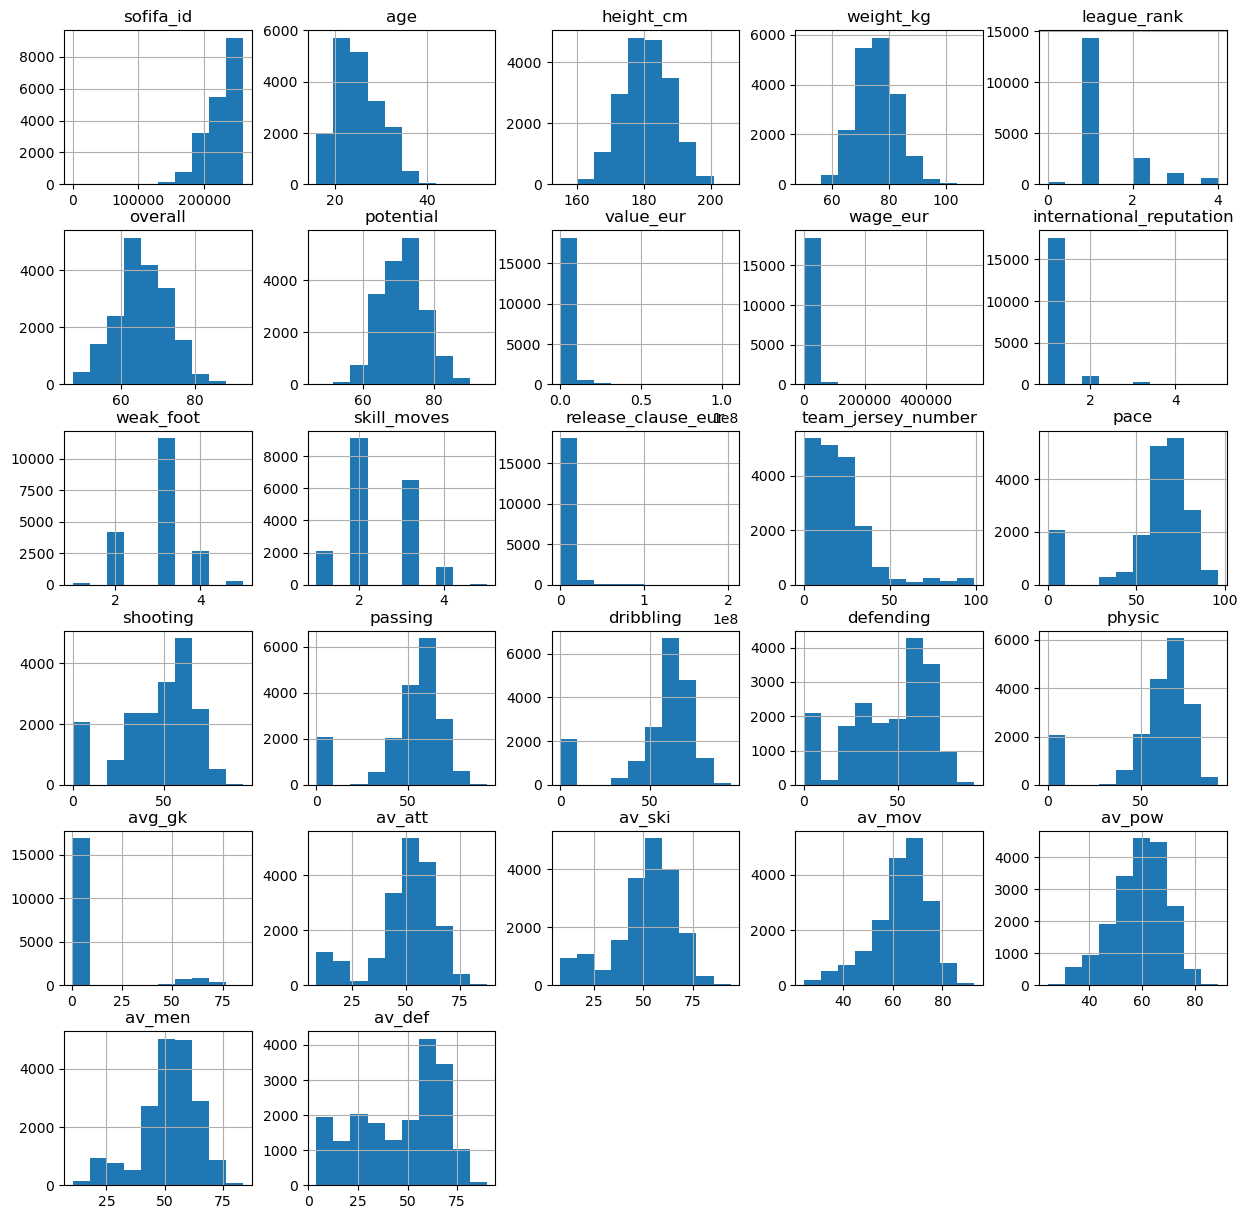

In [33]:
df.hist(figsize=(15,15));

In [34]:
df[df.value_eur == 0].head()

sofifa_id  \
359     230225   
363     230347   
494     245294   
495     245299   
496     245300   

                                                                   player_url  \
359  https://sofifa.com/player/230225/juan-everton-mestres-de-mesquita/210002   
363    https://sofifa.com/player/230347/welington-kaue-dano-nascimento/210002   
494          https://sofifa.com/player/245294/jorge-ezequiel-serendero/210002   
495            https://sofifa.com/player/245299/jaime-nicolas-frendado/210002   
496              https://sofifa.com/player/245300/matias-david-baldona/210002   

         short_name                         long_name  age         dob  \
359  Juiano Mestres  Juan Everton Mestres de Mesquita   24  1996-02-29   
363  Welington Dano    Welington Kauê Dano Nascimento   20  2000-02-29   
494    J. Serendero          Jorge Ezequiel Serendero   32  1988-02-29   
495     J. Frendado            Jaime Nicolás Frendado   36  1984-02-29   
496      M. Baldona              Matías David Baldona   36  1984-02-29   

     height_cm  weight_kg nationality club_name  ... dribbling  defending  \
359        181         82      Brazil         0  ...      62.0       82.0   
363        178         69      Brazil         0  ...      78.0       75.0   
494        190         85     Uruguay         0  ...       0.0        0.0   
495        181         82     Uruguay         0  ...      62.0       82.0   
496        177         75     Uruguay         0  ...      76.0       78.0   

     physic  avg_gk  av_att  av_ski av_mov av_pow  av_men  av_def  
359    80.0     6.6    61.8    62.4   68.8   76.2    68.0    83.7  
363    74.0     5.5    65.4    72.2   80.4   67.2    72.7    77.7  
494     0.0    75.3    11.0    14.6   47.2   48.0    39.3    10.0  
495    75.0     7.3    61.2    62.4   68.2   72.6    68.0    82.0  
496    77.0     5.0    65.6    69.6   74.0   72.6    69.3    78.7  

[5 rows x 37 columns]

In [35]:
# removing 0 values with mean values of overall group
df['value_eur'] = df['value_eur'].replace(0, np.nan)
df['value_eur'] = df['value_eur'].fillna(df.groupby('overall')['value_eur'].transform('mean'))

In [36]:
# lowest = df.loc[df.value_eur < 300000]
# low = df.loc[(df.value_eur >= 300000) & (df.value_eur < 650000)]
# medium = df.loc[(df.value_eur >= 650000) & (df.value_eur < 1800000)]
# high = df.loc[(df.value_eur >= 1800000) & (df.value_eur < 10000000)]
# highest = df.loc[df.value_eur > 10000000]

highest_valued = df.loc[df.value_eur > 15000000]

# values = [lowest, low, medium, high, highest]

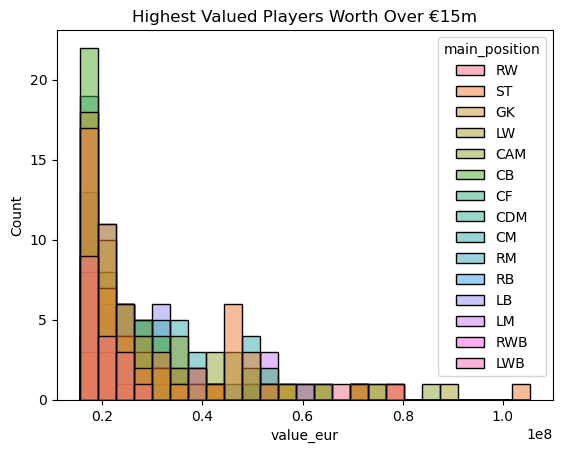

In [37]:
sns.histplot(data=highest_valued, x='value_eur', hue='main_position').set(title='Highest Valued Players Worth Over €15m');

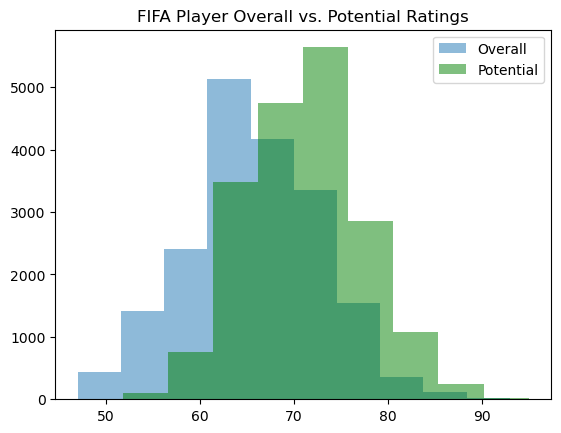

In [38]:
plt.hist(df['overall'], alpha=0.5);
plt.hist(df['potential'], alpha=0.5, color='g');


plt.title('FIFA Player Overall vs. Potential Ratings')
plt.legend(['Overall', 'Potential'])

plt.show()

In [39]:
PL = df.loc[df['league_name'] == "English Premier League"]
PL.head()

sofifa_id                                                     player_url  \
5      192985        https://sofifa.com/player/192985/kevin-de-bruyne/210002   
8      203376        https://sofifa.com/player/203376/virgil-van-dijk/210002   
9      212831  https://sofifa.com/player/212831/alisson-ramses-becker/210002   
10     208722             https://sofifa.com/player/208722/sadio-mane/210002   
11     209331          https://sofifa.com/player/209331/mohamed-salah/210002   

      short_name              long_name  age         dob  height_cm  \
5   K. De Bruyne        Kevin De Bruyne   29  1991-06-28        181   
8    V. van Dijk        Virgil van Dijk   28  1991-07-08        193   
9        Alisson  Alisson Ramsés Becker   27  1992-10-02        191   
10       S. Mané             Sadio Mané   28  1992-04-10        175   
11      M. Salah    Mohamed Salah Ghaly   28  1992-06-15        175   

    weight_kg  nationality        club_name  ... dribbling  defending  physic  \
5          70      Belgium  Manchester City  ...      88.0       64.0    78.0   
8          92  Netherlands        Liverpool  ...      71.0       91.0    86.0   
9          91       Brazil        Liverpool  ...       0.0        0.0     0.0   
10         69      Senegal        Liverpool  ...      90.0       44.0    76.0   
11         71        Egypt        Liverpool  ...      90.0       45.0    75.0   

    avg_gk  av_att  av_ski av_mov av_pow  av_men  av_def  
5      5.1    81.4    88.2   79.6   81.6    83.2    60.7  
8      5.3    63.2    72.6   70.8   80.4    72.8    90.0  
9     84.5    22.8    27.6   53.6   48.0    34.2    11.7  
10     5.1    82.0    78.2   92.0   81.2    73.7    41.3  
11     5.6    78.4    81.2   92.0   78.6    77.7    43.0  

[5 rows x 37 columns]

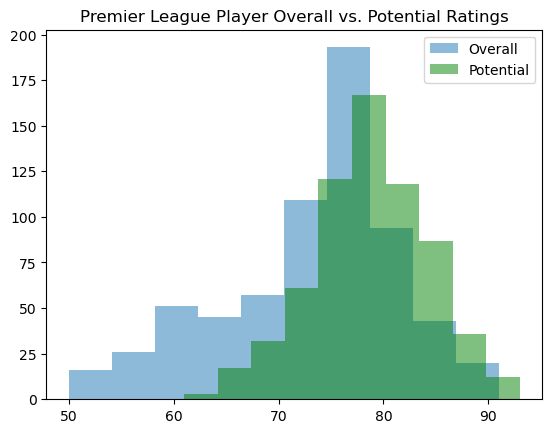

In [40]:
plt.hist(PL['overall'], alpha=0.5);
plt.hist(PL['potential'], alpha=0.5, color='g')

plt.title('Premier League Player Overall vs. Potential Ratings')
plt.legend(['Overall', 'Potential'])

plt.show()

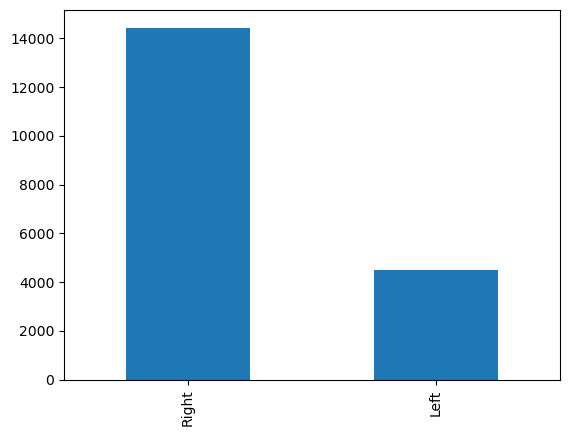

In [41]:
df['preferred_foot'].value_counts().plot(kind = 'bar');

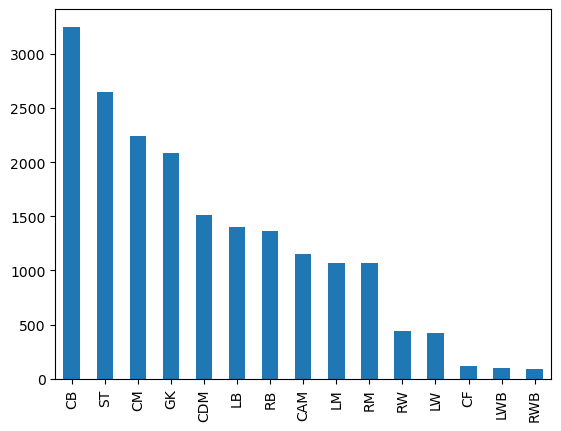

In [42]:
df['main_position'].value_counts().plot(kind = 'bar');

## Bivariate Analysis

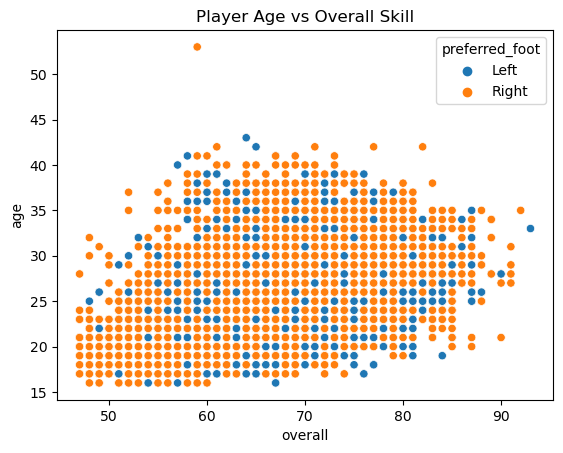

In [43]:
sns.scatterplot(data = df, x = "overall", y = "age", hue = "preferred_foot").set(title=
                                                                'Player Age vs Overall Skill');

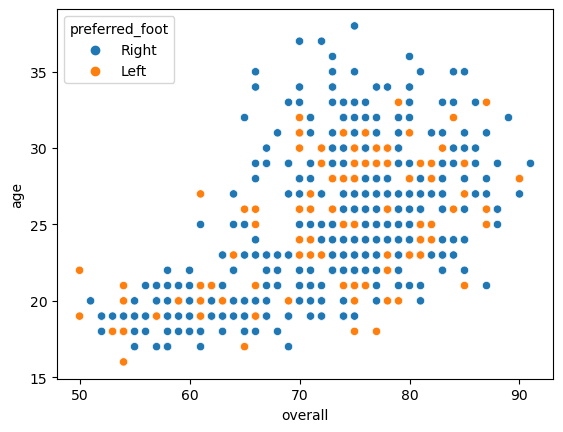

In [44]:
sns.scatterplot(data = PL, x = "overall", y = "age", hue = "preferred_foot");

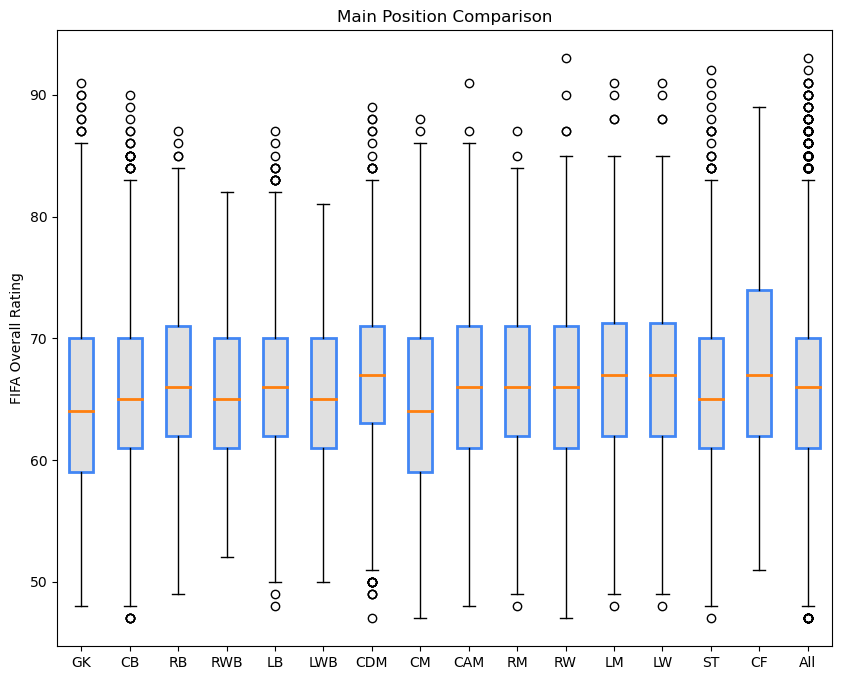

In [45]:
plt.style.use('default')
# plt.style.use("fivethirtyeight")

plt.figure(figsize=(10,8))

GK = df.loc[df.main_position == 'GK']['overall']
CB = df.loc[df.main_position == 'CB']['overall']
RB = df.loc[df.main_position == 'RB']['overall']
RWB = df.loc[df.main_position == 'RWB']['overall']
LB = df.loc[df.main_position == 'LB']['overall']
LWB = df.loc[df.main_position == 'LWB']['overall']
CDM = df.loc[df.main_position == 'CDM']['overall']
CM = df.loc[df.main_position == 'CM']['overall']
CAM = df.loc[df.main_position == 'CAM']['overall']
RM = df.loc[df.main_position == 'RM']['overall']
RW = df.loc[df.main_position == 'RW']['overall']
LM = df.loc[df.main_position == 'LW']['overall']
LW = df.loc[df.main_position == 'LW']['overall']
ST = df.loc[df.main_position == 'ST']['overall']
CF = df.loc[df.main_position == 'CF']['overall']
All = df['overall']

labels = ['GK', 'CB', 'RB', 'RWB', 'LB', 'LWB', 'CDM', 'CM', 'CAM', 'RM', 'RW', 'LM', 'LW', 'ST', 'CF', 'All']

boxes = plt.boxplot([GK, CB, RB, RWB, LB, LWB, CDM, CM, CAM, RM, RW, LM, LW, ST, CF, All], labels=labels, 
                    patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # set edge colour
    box.set(color='#4286f4', linewidth=2)
    
    # change fill colour
    box.set(facecolor='#e0e0e0')

plt.title('Main Position Comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()

In [46]:
df['league_name'].value_counts()

English League Championship             709
USA Major League Soccer                 701
Argentina Primera División              659
English Premier League                  654
Spain Primera Division                  645
Italian Serie A                         645
English League One                      630
Spanish Segunda División                619
English League Two                      605
French Ligue 1                          600
Turkish Süper Lig                       589
German 1. Bundesliga                    548
French Ligue 2                          546
German 3. Bundesliga                    522
Japanese J. League Division 1           521
Portuguese Liga ZON SAGRES              510
Mexican Liga MX                         509
German 2. Bundesliga                    507
Belgian Jupiler Pro League              492
Holland Eredivisie                      466
Chinese Super League                    436
Saudi Abdul L. Jameel League            435
Polish T-Mobile Ekstraklasa     

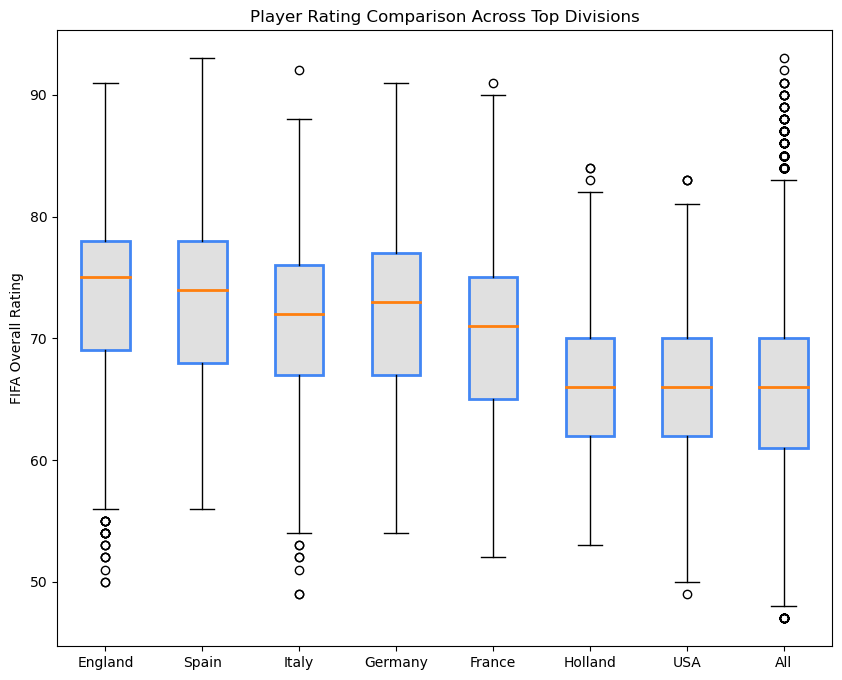

In [47]:
plt.style.use('default')
# plt.style.use("fivethirtyeight")

plt.figure(figsize=(10,8))

England = df.loc[df['league_name'] == "English Premier League"]['overall']
Spain = df.loc[df['league_name'] == 'Spain Primera Division']['overall']
Italy = df.loc[df['league_name'] == 'Italian Serie A']['overall']
Germany = df.loc[df['league_name'] == 'German 1. Bundesliga']['overall']
France = df.loc[df['league_name'] == 'French Ligue 1']['overall']
Holland = df.loc[df['league_name'] == 'Holland Eredivisie']['overall']
USA = df.loc[df['league_name'] == 'USA Major League Soccer']['overall']
All = df['overall']

labels = ['England', 'Spain', 'Italy', 'Germany', 'France', 'Holland', 'USA', 'All']

boxes = plt.boxplot([England, Spain, Italy, Germany, France, Holland, USA, All], labels=labels, 
                    patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # set edge colour
    box.set(color='#4286f4', linewidth=2)
    
    # change fill colour
    box.set(facecolor='#e0e0e0')

plt.title('Player Rating Comparison Across Top Divisions')
plt.ylabel('FIFA Overall Rating')

plt.show()

In [48]:
key_columns = ['age', 'overall', 'potential', 'pace', 'shooting', 'passing',
               'dribbling', 'defending', 'physic']

In [49]:
df[key_columns].head()

age  overall  potential  pace  shooting  passing  dribbling  defending  \
0   33       93         93  85.0      92.0     91.0       95.0       38.0   
1   35       92         92  89.0      93.0     81.0       89.0       35.0   
2   27       91         93   0.0       0.0      0.0        0.0        0.0   
3   31       91         91  78.0      91.0     78.0       85.0       43.0   
4   28       91         91  91.0      85.0     86.0       94.0       36.0   

   physic  
0    65.0  
1    77.0  
2     0.0  
3    82.0  
4    59.0

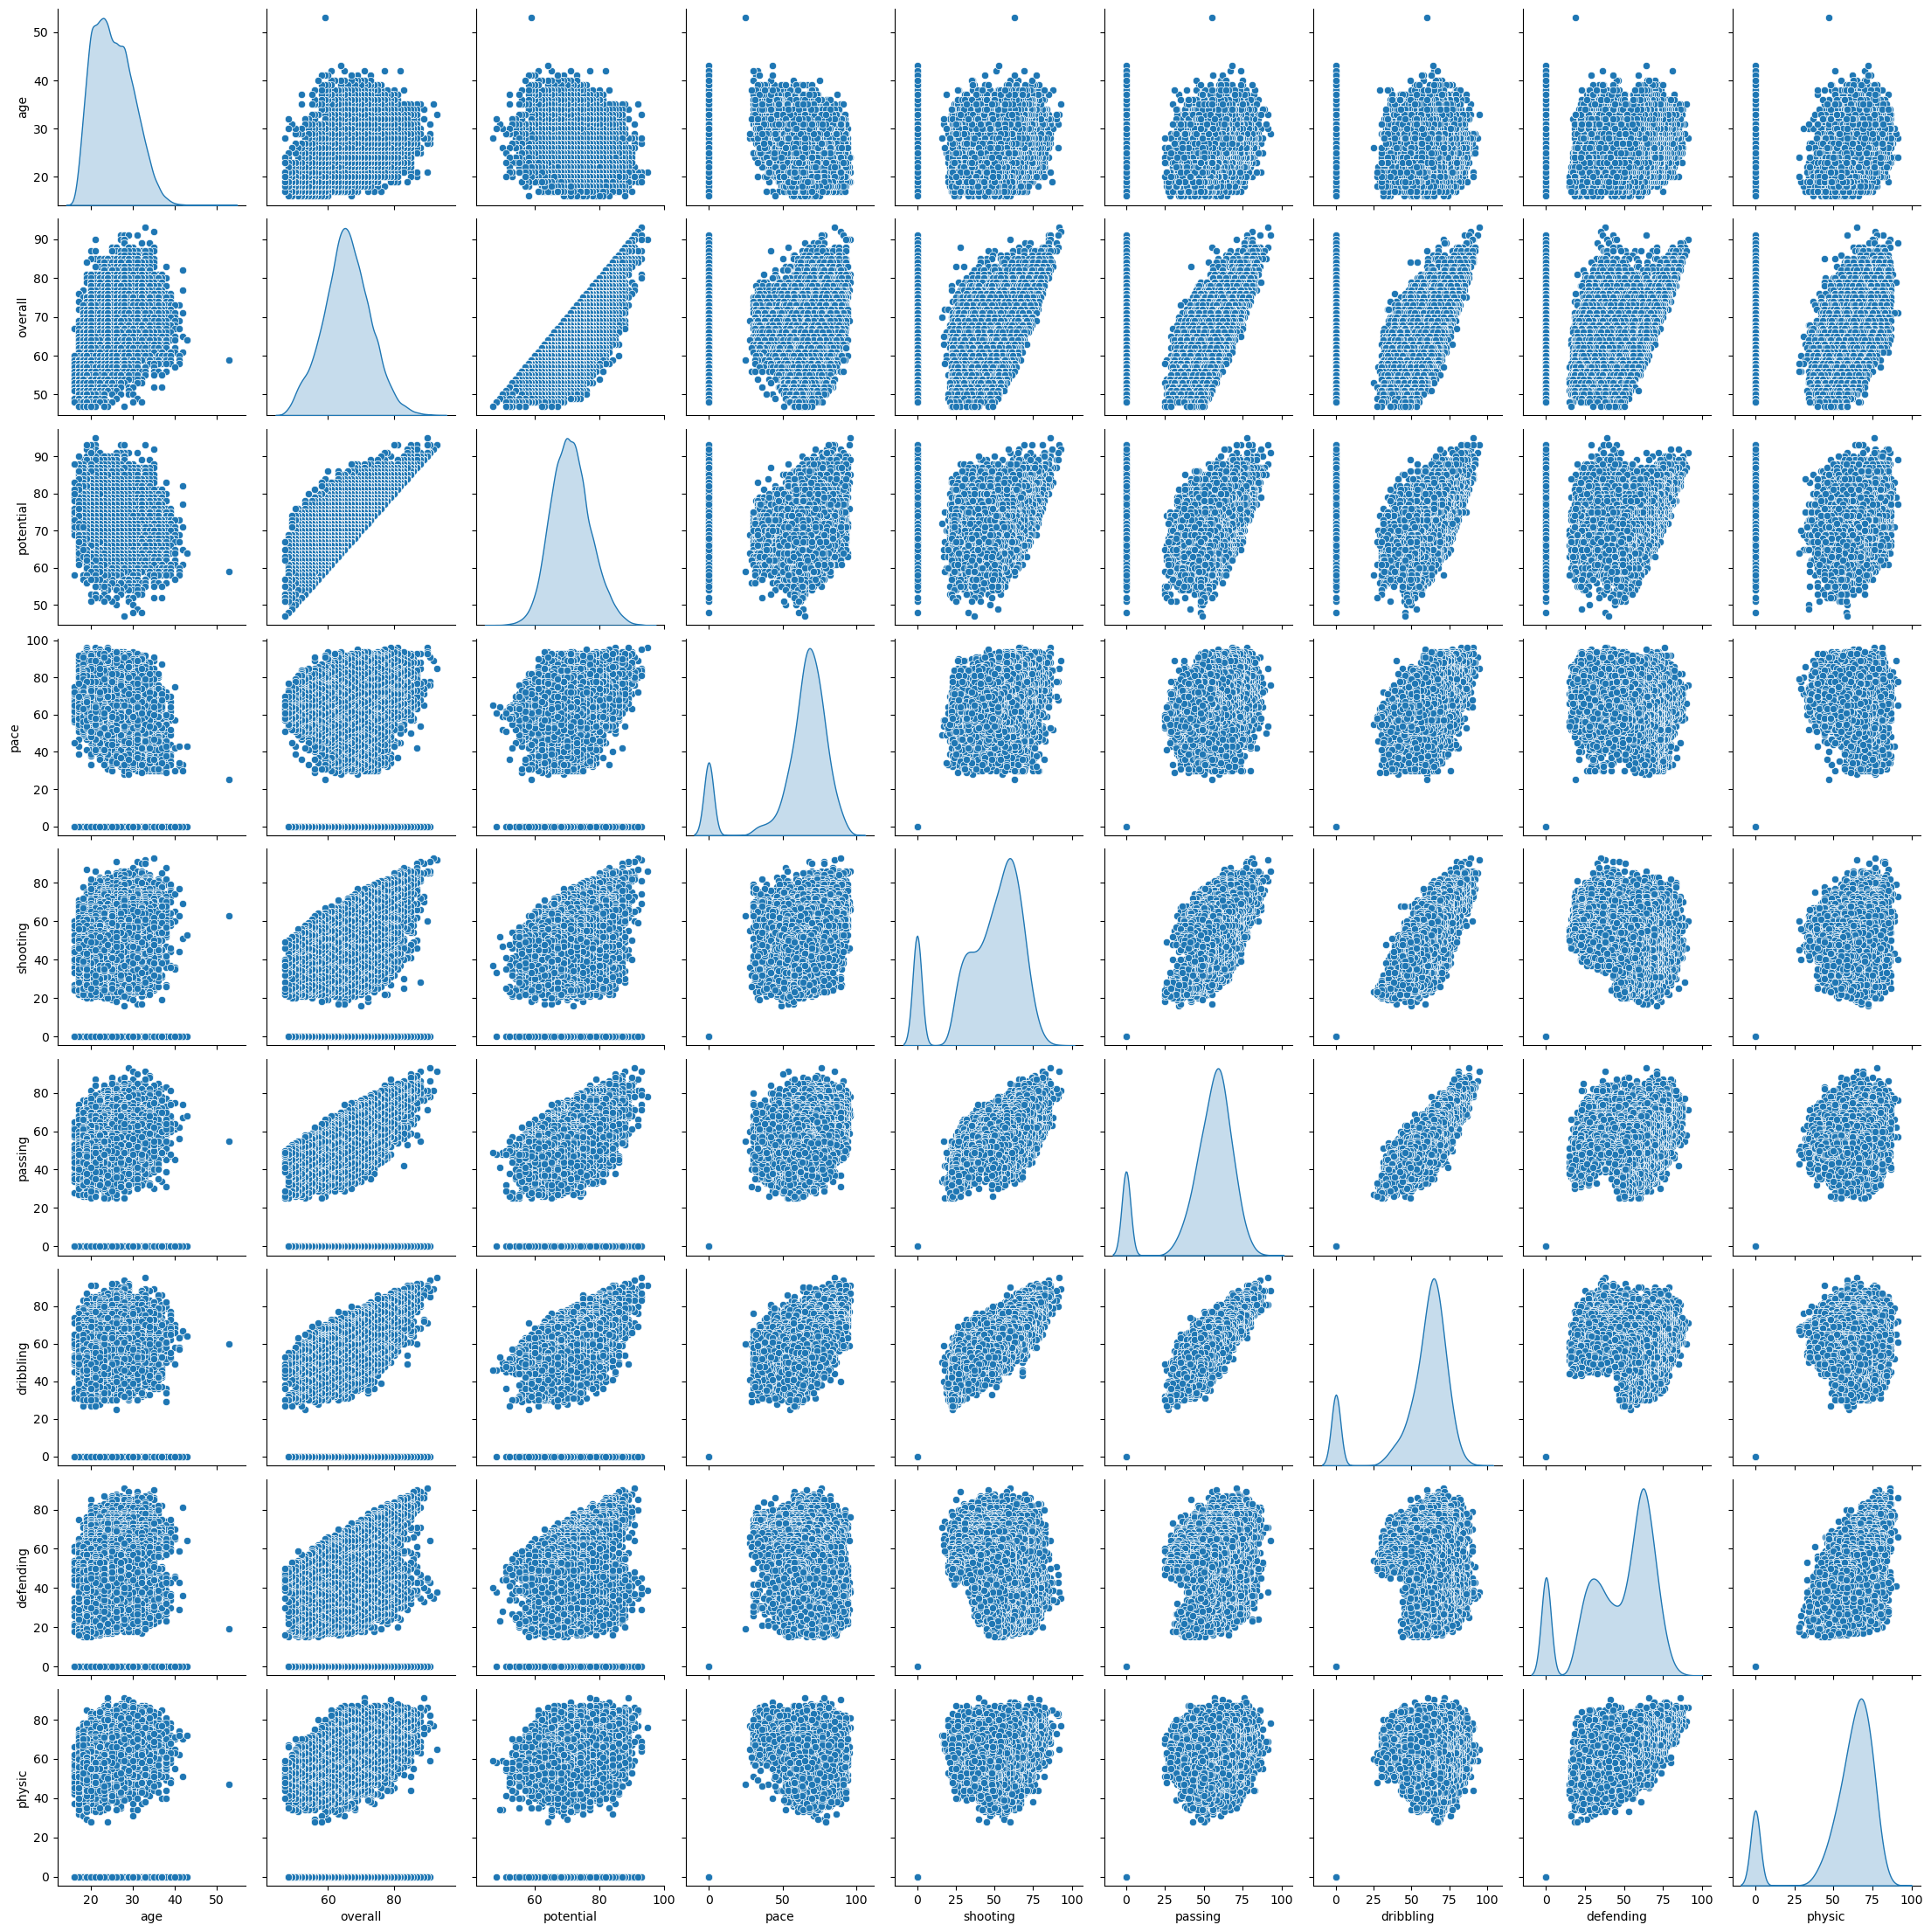

In [50]:
sns.pairplot(data=df[key_columns], diag_kind = 'kde');

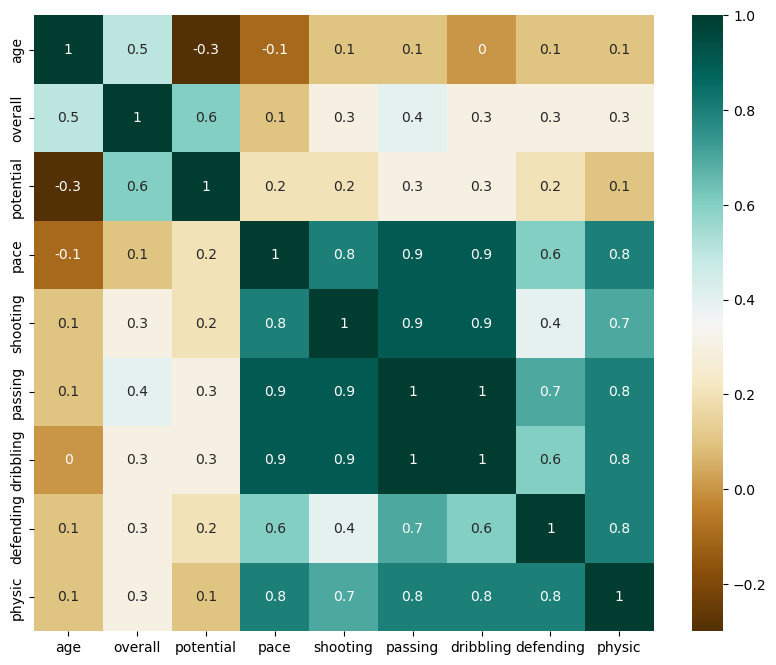

In [51]:
corr = df[key_columns].corr().round(1)

plt.figure(figsize = (10,8))

sns.heatmap(corr, annot = True, cmap='BrBG'); # DIVERGING COLOR SCHEME

# Standardising the values

In [52]:
df = pd.get_dummies(df, columns=['main_position'], drop_first=False)

In [53]:
df.head()

sofifa_id  \
0     158023   
1      20801   
2     200389   
3     188545   
4     190871   

                                                           player_url  \
0                https://sofifa.com/player/158023/lionel-messi/210002   
1  https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210002   
2                   https://sofifa.com/player/200389/jan-oblak/210002   
3          https://sofifa.com/player/188545/robert-lewandowski/210002   
4   https://sofifa.com/player/190871/neymar-da-silva-santos-jr/210002   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...  \
0        170         72   Argentina         FC Barcelona  ...   
1        187         83    Portugal             Juventus  ...   
2        188         87    Slovenia      Atlético Madrid  ...   
3        184         80      Poland    FC Bayern München  ...   
4        175         68      Brazil  Paris Saint-Germain  ...   

  main_position_GK  main_position_LB  main_position_LM  main_position_LW  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                1                 0                 0                 0   
3                0                 0                 0                 0   
4                0                 0                 0                 1   

   main_position_LWB  main_position_RB main_position_RM  main_position_RW  \
0                  0                 0                0                 1   
1                  0                 0                0                 0   
2                  0                 0                0                 0   
3                  0                 0                0                 0   
4                  0                 0                0                 0   

   main_position_RWB  main_position_ST  
0                  0                 0  
1                  0                 1  
2                  0                 0  
3                  0                 1  
4                  0                 0  

[5 rows x 51 columns]

In [54]:
# checking data types of new get dummies columns
df['main_position_GK'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18944 entries, 0 to 18943
Series name: main_position_GK
Non-Null Count  Dtype
--------------  -----
18944 non-null  uint8
dtypes: uint8(1)
memory usage: 18.6 KB


In [55]:
numerical_drop_cols = ['sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'value_eur', 'wage_eur', 
                       'international_reputation', 'release_clause_eur', 'team_jersey_number']

In [56]:
# we will use this stats dataframe later to run our clustering model
stats = df.select_dtypes(['int', 'float', 'uint8']).drop(columns = numerical_drop_cols)

In [57]:
stats.head()

overall  potential  weak_foot  skill_moves  pace  shooting  passing  \
0       93         93          4            4  85.0      92.0     91.0   
1       92         92          4            5  89.0      93.0     81.0   
2       91         93          3            1   0.0       0.0      0.0   
3       91         91          4            4  78.0      91.0     78.0   
4       91         91          5            5  91.0      85.0     86.0   

   dribbling  defending  physic  ...  main_position_GK  main_position_LB  \
0       95.0       38.0    65.0  ...                 0                 0   
1       89.0       35.0    77.0  ...                 0                 0   
2        0.0        0.0     0.0  ...                 1                 0   
3       85.0       43.0    82.0  ...                 0                 0   
4       94.0       36.0    59.0  ...                 0                 0   

   main_position_LM  main_position_LW  main_position_LWB  main_position_RB  \
0                 0                 0                  0                 0   
1                 0                 0                  0                 0   
2                 0                 0                  0                 0   
3                 0                 0                  0                 0   
4                 0                 1                  0                 0   

   main_position_RM  main_position_RW  main_position_RWB  main_position_ST  
0                 0                 1                  0                 0  
1                 0                 0                  0                 1  
2                 0                 0                  0                 0  
3                 0                 0                  0                 1  
4                 0                 0                  0                 0  

[5 rows x 32 columns]

In [58]:
stats.shape

(18944, 32)

In [59]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   overall            18944 non-null  int64  
 1   potential          18944 non-null  int64  
 2   weak_foot          18944 non-null  int64  
 3   skill_moves        18944 non-null  int64  
 4   pace               18944 non-null  float64
 5   shooting           18944 non-null  float64
 6   passing            18944 non-null  float64
 7   dribbling          18944 non-null  float64
 8   defending          18944 non-null  float64
 9   physic             18944 non-null  float64
 10  avg_gk             18944 non-null  float64
 11  av_att             18944 non-null  float64
 12  av_ski             18944 non-null  float64
 13  av_mov             18944 non-null  float64
 14  av_pow             18944 non-null  float64
 15  av_men             18944 non-null  float64
 16  av_def             189

In [60]:
stats.describe()

overall     potential     weak_foot   skill_moves          pace  \
count  18944.000000  18944.000000  18944.000000  18944.000000  18944.000000   
mean      65.677787     71.086729      2.936603      2.363017     60.227618   
std        7.002278      6.109985      0.667132      0.766469     23.570006   
min       47.000000     47.000000      1.000000      1.000000      0.000000   
25%       61.000000     67.000000      3.000000      2.000000     57.000000   
50%       66.000000     71.000000      3.000000      2.000000     67.000000   
75%       70.000000     75.000000      3.000000      3.000000     74.000000   
max       93.000000     95.000000      5.000000      5.000000     96.000000   

           shooting      passing     dribbling     defending        physic  \
count  18944.000000  18944.00000  18944.000000  18944.000000  18944.000000   
mean      46.527027     50.85663     55.588102     45.673775     57.371358   
std       21.016229     20.33423     21.717156     22.299431     22.163045   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%       35.000000     47.00000     53.000000     30.000000     54.000000   
50%       52.000000     56.00000     62.000000     52.000000     64.000000   
75%       62.000000     63.00000     68.000000     63.000000     71.000000   
max       93.000000     93.00000     95.000000     91.000000     91.000000   

       ...  main_position_GK  main_position_LB  main_position_LM  \
count  ...      18944.000000      18944.000000      18944.000000   
mean   ...          0.110008          0.074008          0.056429   
std    ...          0.312909          0.261790          0.230755   
min    ...          0.000000          0.000000          0.000000   
25%    ...          0.000000          0.000000          0.000000   
50%    ...          0.000000          0.000000          0.000000   
75%    ...          0.000000          0.000000          0.000000   
max    ...          1.000000          1.000000          1.000000   

       main_position_LW  main_position_LWB  main_position_RB  \
count      18944.000000       18944.000000      18944.000000   
mean           0.022171           0.005279          0.071949   
std            0.147242           0.072465          0.258410   
min            0.000000           0.000000          0.000000   
25%            0.000000           0.000000          0.000000   
50%            0.000000           0.000000          0.000000   
75%            0.000000           0.000000          0.000000   
max            1.000000           1.000000          1.000000   

       main_position_RM  main_position_RW  main_position_RWB  main_position_ST  
count      18944.000000      18944.000000       18944.000000      18944.000000  
mean           0.056218          0.023121           0.004645          0.139622  
std            0.230349          0.150291           0.068000          0.346604  
min            0.000000          0.000000           0.000000          0.000000  
25%            0.000000          0.000000           0.000000          0.000000  
50%            0.000000          0.000000           0.000000          0.000000  
75%            0.000000          0.000000           0.000000          0.000000  
max            1.000000          1.000000           1.000000          1.000000  

[8 rows x 32 columns]

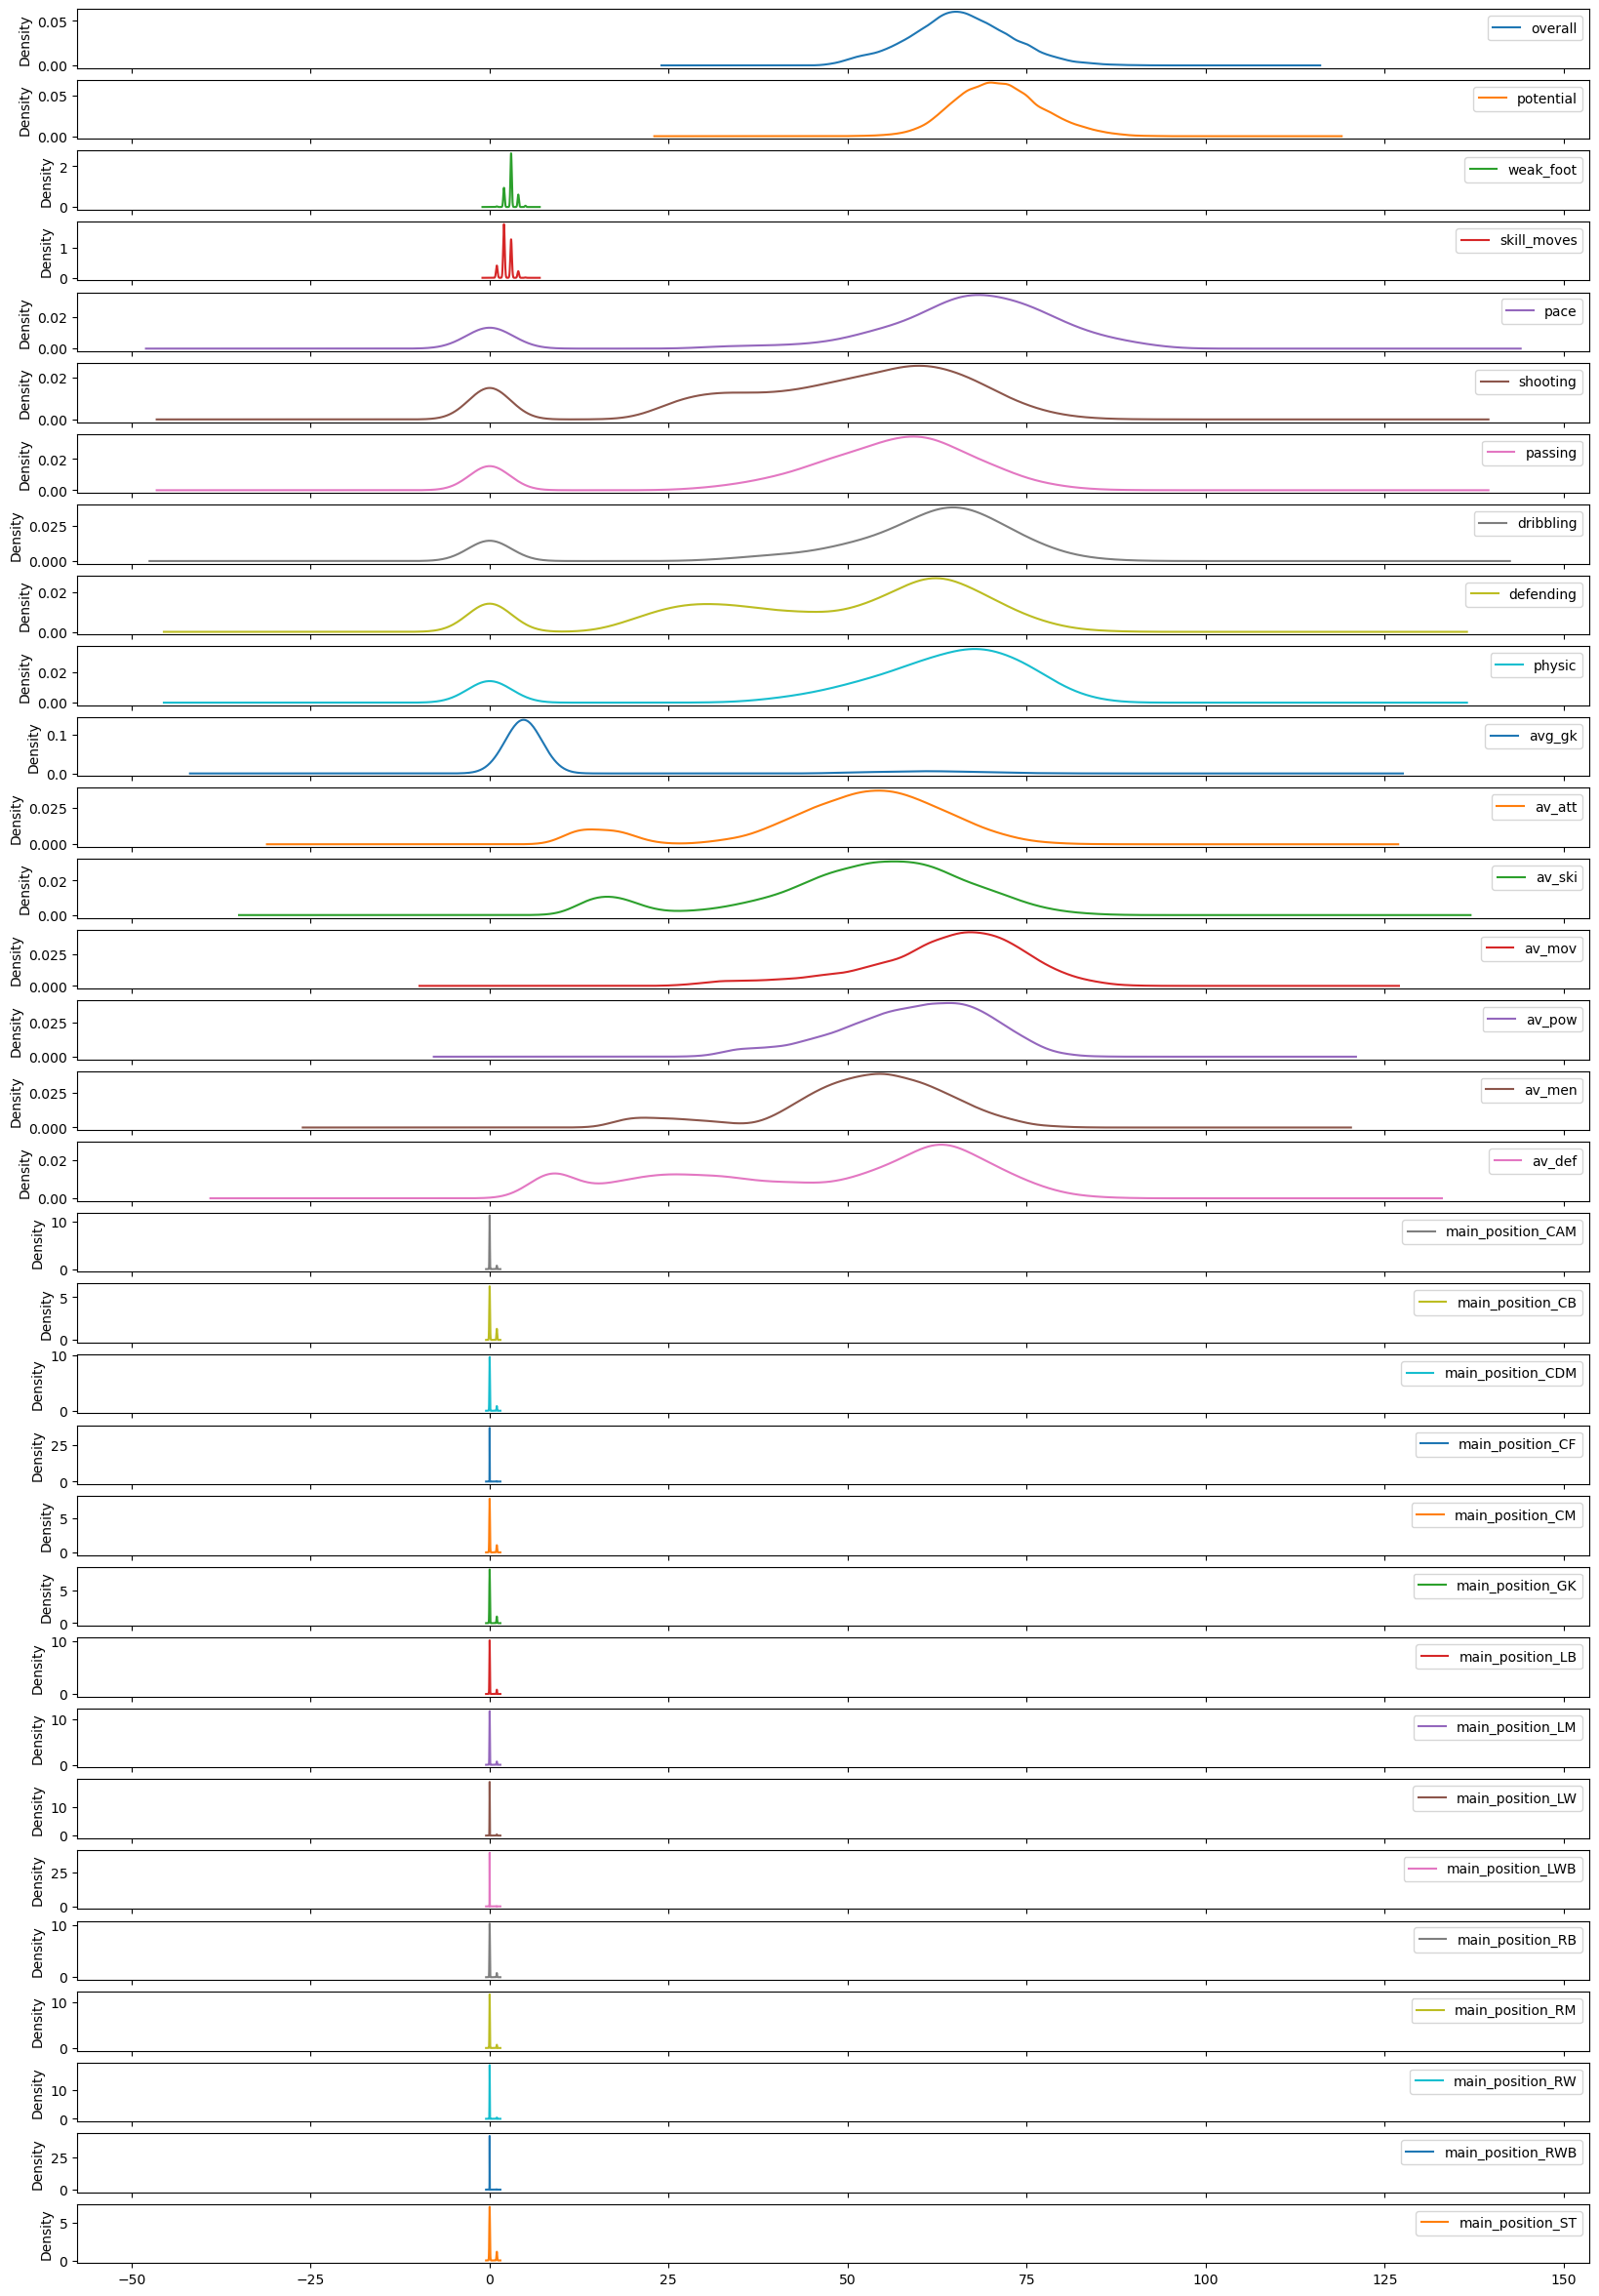

In [61]:
stats.plot(kind = 'kde', subplots = True, figsize = (20, 30));

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

# scaling the dataset
stats_scaled = scaler.fit_transform(stats)

In [64]:
type(stats_scaled)

numpy.ndarray

In [65]:
stats_scaled = pd.DataFrame(stats_scaled, columns = stats.columns)

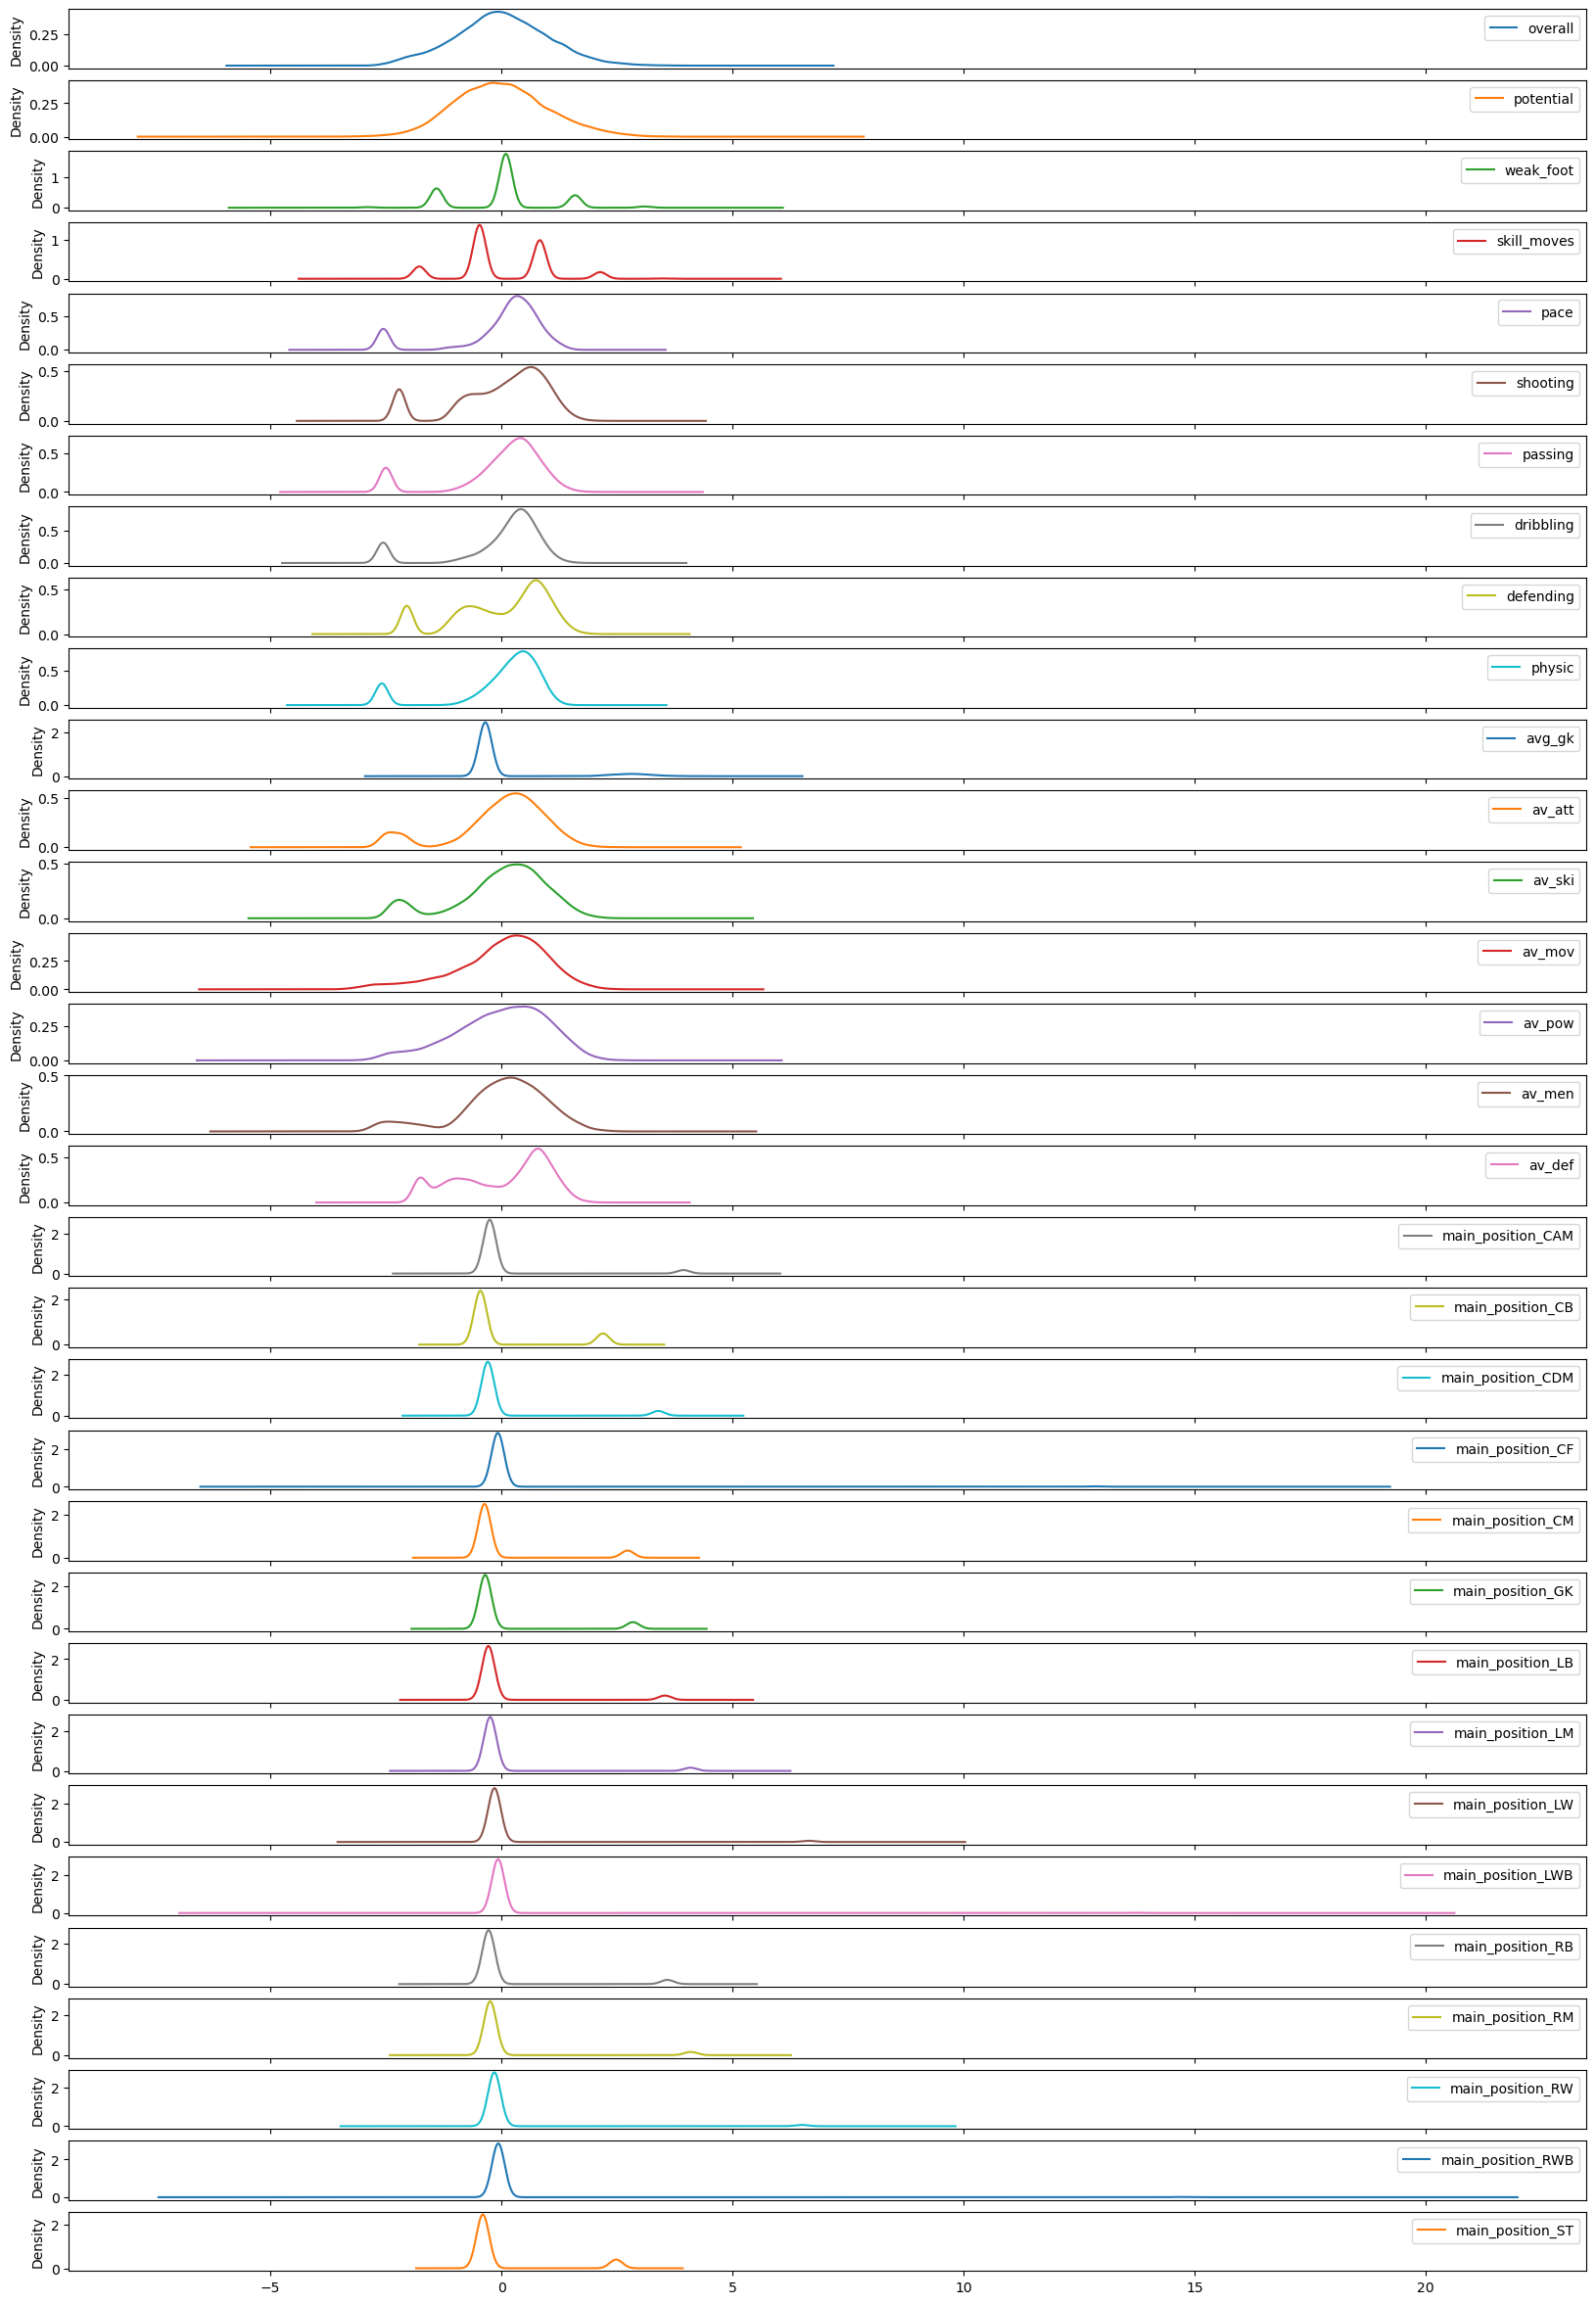

In [66]:
stats_scaled.plot(kind = 'kde', subplots = True, figsize = (20, 30));

# Fit the Nearest Neighbours model

In [67]:
# calling the model 
from sklearn.neighbors import NearestNeighbors

In [68]:
# initiating the model 
nn = NearestNeighbors(n_neighbors=6)

In [69]:
# fit the model on data. This is unsupervised in nature
nn.fit(stats_scaled)

NearestNeighbors(n_neighbors=6)

# Testing the model to generate predictions

## Finding the closest player to your search target

In [70]:
select_player = df.query("short_name == 'L. Messi' ").select_dtypes(['int', 'float', 'uint8']).drop(columns = numerical_drop_cols)

In [71]:
select_player

overall  potential  weak_foot  skill_moves  pace  shooting  passing  \
0       93         93          4            4  85.0      92.0     91.0   

   dribbling  defending  physic  ...  main_position_GK  main_position_LB  \
0       95.0       38.0    65.0  ...                 0                 0   

   main_position_LM  main_position_LW  main_position_LWB  main_position_RB  \
0                 0                 0                  0                 0   

   main_position_RM  main_position_RW  main_position_RWB  main_position_ST  
0                 0                 1                  0                 0  

[1 rows x 32 columns]

In [72]:
select_player_scaled = scaler.transform(select_player)

In [73]:
select_player_scaled

array([[ 3.90200649,  3.58656347,  1.59402635,  2.1358022 ,  1.05104069,
         2.16376461,  1.97422918,  1.81482967, -0.34413335,  0.3442146 ,
        -0.33951066,  2.42183335,  2.71402217,  2.38354618,  1.81954818,
         1.76126027, -0.65654422, -0.25398598, -0.4552355 , -0.29472315,
        -0.07815114, -0.36628884, -0.35157669, -0.28270563, -0.24454896,
        -0.15057652, -0.0728473 , -0.27843648, -0.2440637 ,  6.50008781,
        -0.06831508, -0.40283979]])

In [74]:
select_player_scaled = pd.DataFrame(select_player_scaled, columns = select_player.columns)

In [75]:
select_player_scaled

overall  potential  weak_foot  skill_moves      pace  shooting   passing  \
0  3.902006   3.586563   1.594026     2.135802  1.051041  2.163765  1.974229   

   dribbling  defending    physic  ...  main_position_GK  main_position_LB  \
0    1.81483  -0.344133  0.344215  ...         -0.351577         -0.282706   

   main_position_LM  main_position_LW  main_position_LWB  main_position_RB  \
0         -0.244549         -0.150577          -0.072847         -0.278436   

   main_position_RM  main_position_RW  main_position_RWB  main_position_ST  
0         -0.244064          6.500088          -0.068315          -0.40284  

[1 rows x 32 columns]

**Get the recommendations**

In [76]:
nn.kneighbors(select_player_scaled,  return_distance=True)

(array([[2.06476546e-07, 2.18128871e+00, 2.69276001e+00, 2.76954108e+00,
         3.30076823e+00, 3.36889627e+00]]),
 array([[  0,  11,  34,  98, 264, 176]]))

**Get only the row positions**

In [77]:
# get only the array values
nn.kneighbors(select_player_scaled,  return_distance=True)[1:]

(array([[  0,  11,  34,  98, 264, 176]]),)

In [78]:
nn.kneighbors(select_player_scaled,  return_distance=False)[:]

array([[  0,  11,  34,  98, 264, 176]])

**We will ignore the first recommendation as that is the song itself**

In [79]:
recco_list = nn.kneighbors(select_player_scaled,  return_distance=False)[:,1:].tolist()[0]# Skip the first value 

In [80]:
recco_list

[11, 34, 98, 264, 176]

**Recommended Player Names**

In [81]:
df.loc[recco_list,['short_name', 'sofifa_id', 'player_url']]

short_name  sofifa_id  \
11         M. Salah     209331   
34   Bernardo Silva     218667   
98        R. Mahrez     204485   
264      F. Thauvin     204970   
176         G. Bale     173731   

                                                                 player_url  
11                    https://sofifa.com/player/209331/mohamed-salah/210002  
34   https://sofifa.com/player/218667/bernardo-mota-carvalho-e-silva/210002  
98                     https://sofifa.com/player/204485/riyad-mahrez/210002  
264                 https://sofifa.com/player/204970/florian-thauvin/210002  
176                     https://sofifa.com/player/173731/gareth-bale/210002

In [82]:
neighbours = df.loc[recco_list,['short_name', 'sofifa_id', 'player_url']]

In [83]:
neighbours

short_name  sofifa_id  \
11         M. Salah     209331   
34   Bernardo Silva     218667   
98        R. Mahrez     204485   
264      F. Thauvin     204970   
176         G. Bale     173731   

                                                                 player_url  
11                    https://sofifa.com/player/209331/mohamed-salah/210002  
34   https://sofifa.com/player/218667/bernardo-mota-carvalho-e-silva/210002  
98                     https://sofifa.com/player/204485/riyad-mahrez/210002  
264                 https://sofifa.com/player/204970/florian-thauvin/210002  
176                     https://sofifa.com/player/173731/gareth-bale/210002

**We need to render the links dynamic**

In [84]:
HTML(neighbours.to_html(render_links=True, escape=False))

## Finding the closest player within a team

In [85]:
liverpool = df.loc[df['club_name'] == 'Liverpool'].reset_index()
liverpool = liverpool.drop(columns='index')
liverpool

sofifa_id  \
0      203376   
1      212831   
2      208722   
3      209331   
4      231281   
5      209499   
6      216267   
7      201942   
8      183711   
9      181291   
10     189509   
11     225100   
12     197061   
13     220971   
14     193348   
15     224458   
16     138412   
17     198784   
18     203775   
19     220710   
20     213135   
21     226627   
22     232223   
23     194911   
24     232099   
25     238460   
26     240926   
27     243057   
28     236248   
29     246174   
30     242453   
31     242434   
32     240913   

                                                                     player_url  \
0                       https://sofifa.com/player/203376/virgil-van-dijk/210002   
1                 https://sofifa.com/player/212831/alisson-ramses-becker/210002   
2                            https://sofifa.com/player/208722/sadio-mane/210002   
3                         https://sofifa.com/player/209331/mohamed-salah/210002   
4                https://sofifa.com/player/231281/trent-alexander-arnold/210002   
5                https://sofifa.com/player/209499/fabio-henrique-tavares/210002   
6                      https://sofifa.com/player/216267/andrew-robertson/210002   
7   https://sofifa.com/player/201942/roberto-firmino-barbosa-de-oliveira/210002   
8                      https://sofifa.com/player/183711/jordan-henderson/210002   
9                   https://sofifa.com/player/181291/georginio-wijnaldum/210002   
10                     https://sofifa.com/player/189509/thiago-alcantara/210002   
11                            https://sofifa.com/player/225100/joe-gomez/210002   
12                           https://sofifa.com/player/197061/joel-matip/210002   
13                           https://sofifa.com/player/220971/naby-keita/210002   
14                      https://sofifa.com/player/193348/xherdan-shaqiri/210002   
15         https://sofifa.com/player/224458/diogo-jose-teixeira-da-silva/210002   
16                         https://sofifa.com/player/138412/james-milner/210002   
17              https://sofifa.com/player/198784/alex-oxlade-chamberlain/210002   
18                         https://sofifa.com/player/203775/loris-karius/210002   
19                         https://sofifa.com/player/220710/harry-wilson/210002   
20                         https://sofifa.com/player/213135/divock-origi/210002   
21                      https://sofifa.com/player/226627/takumi-minamino/210002   
22                https://sofifa.com/player/232223/konstantinos-tsimikas/210002   
23           https://sofifa.com/player/194911/adrian-san-miguel-castillo/210002   
24                         https://sofifa.com/player/232099/marko-grujic/210002   
25                       https://sofifa.com/player/238460/rhian-brewster/210002   
26                   https://sofifa.com/player/240926/nathaniel-phillips/210002   
27                        https://sofifa.com/player/243057/neco-williams/210002   
28                         https://sofifa.com/player/236248/ben-woodburn/210002   
29                       https://sofifa.com/player/246174/harvey-elliott/210002   
30                    https://sofifa.com/player/242453/sepp-van-den-berg/210002   
31                         https://sofifa.com/player/242434/curtis-jones/210002   
32                    https://sofifa.com/player/240913/caoimhin-kelleher/210002   

               short_name                            long_name  age  \
0             V. van Dijk                      Virgil van Dijk   28   
1                 Alisson                Alisson Ramsés Becker   27   
2                 S. Mané                           Sadio Mané   28   
3                M. Salah                  Mohamed Salah Ghaly   28   
4     T. Alexander-Arnold               Trent Alexander-Arnold   21   
5                 Fabinho               Fábio Henrique Tavares   26   
6            A. Robertson                     Andrew Robertson   26   
7         Roberto Firmino  Roberto

In [86]:
# scaling the dataset
liverpool_stats_scaled = scaler.fit_transform(stats.loc[df['club_name'] == 'Liverpool'])

In [87]:
liverpool_stats_scaled = pd.DataFrame(liverpool_stats_scaled, columns = stats.columns)
liverpool_stats_scaled

overall  potential  weak_foot  skill_moves      pace  shooting   passing  \
0   1.339594   1.563732  -0.380143    -0.924678  0.396808  0.123005  0.313059   
1   1.339594   1.563732  -0.380143    -1.822160 -2.504636 -2.196523 -2.497275   
2   1.339594   1.338391   0.874329     0.870285  1.083993  1.089476  0.669299   
3   1.339594   1.338391  -0.380143     0.870285  1.045816  1.128134  0.708881   
4   0.987818   1.789073   0.874329    -0.027196  0.549516  0.354958  0.946374   
5   0.987818   1.113049  -1.634615    -0.027196  0.053216  0.470935  0.629716   
6   0.987818   1.113049  -1.634615    -0.027196  0.625870  0.200323  0.669299   
7   0.987818   0.662367   0.874329     1.767767  0.434985  0.896182  0.708881   
8   0.870559   0.437026  -0.380143    -0.027196 -0.023138  0.664229  0.827627   
9   0.753300   0.211684   0.874329     0.870285  0.396808  0.702887  0.708881   
10  0.753300   0.211684  -0.380143     1.767767 -0.061314  0.586911  0.867209   
11  0.518782   0.887708  -0.380143    -0.027196  0.625870 -1.036759  0.115148   
12  0.518782  -0.013657  -1.634615    -0.924678 -0.214022 -0.418218  0.194313   
13  0.284264   0.211684   0.874329     0.870285  0.205924  0.625570  0.510970   
14  0.284264  -0.689681   0.874329     1.767767  0.473162  0.780205  0.669299   
15  0.167005   0.437026   2.128801     0.870285  0.664047  0.780205  0.313059   
16  0.167005  -0.915022   0.874329    -0.027196 -0.290376  0.509593  0.748463   
17  0.049746  -0.915022   0.874329     0.870285  0.511339  0.664229  0.590134   
18 -0.067513  -0.689681  -0.380143    -1.822160 -2.504636 -2.196523 -2.497275   
19 -0.184772  -0.238998  -0.380143    -0.027196  0.473162  0.818864  0.471388   
20 -0.184772  -0.464340   0.874329     0.870285  0.625870  0.741546  0.154730   
21 -0.184772  -0.915022   0.874329    -0.027196  0.816754  0.625570  0.233895   
22 -0.302031  -0.689681  -0.380143    -0.027196  0.816754  0.045688  0.273477   
23 -0.302031  -1.816387  -1.634615    -1.822160 -2.504636 -2.196523 -2.497275   
24 -0.419289  -0.689681  -0.380143    -0.027196 -0.175845  0.548252  0.313059   
25 -1.005584  -0.013657   0.874329    -0.027196  0.511339  0.548252 -0.320256   
26 -1.240102  -2.041729  -0.380143    -0.924678 -0.557614 -1.075418 -0.557749   
27 -1.357361   0.211684  -1.634615    -0.924678  0.358632 -0.804806 -0.122345   
28 -1.474620  -0.689681   0.874329    -0.027196  0.358632  0.200323 -0.161927   
29 -1.591879   0.211684   0.874329    -0.027196  0.358632 -0.147606 -0.161927   
30 -1.591879  -0.464340  -0.380143    -0.924678 -0.061314 -1.036759 -0.320256   
31 -1.709137  -0.013657   0.874329     0.870285  0.015039  0.200323 -0.003598   
32 -2.060914  -2.041729  -1.634615    -1.822160 -2.504636 -2.196523 -2.497275   

    dribbling  defending    physic  ...  main_position_GK  main_position_LB  \
0    0.129453   1.378537  0.975737  ...         -0.371391         -0.254000   
1   -2.531148  -1.946561 -2.464190  ...          2.692582         -0.254000   
2    0.841445  -0.338821  0.575745  ...         -0.371391         -0.254000   
3    0.841445  -0.302282  0.535746  ...         -0.371391         -0.254000   
4    0.466712   0.976602  0.375750  ...         -0.371391         -0.254000   
5    0.354293   1.159300  0.855739  ...         -0.371391         -0.254000   
6    0.466712   1.013142  0.575745  ...         -0.371391          3.937004   
7    0.841445   0.282351  0.655744  ...         -0.371391         -0.254000   
8    0.429239   1.013142  0.815740  ...         -0.371391         -0.254000   
9    0.691552   0.903523  0.695743  ...         -0.371391         -0.254000   
10   0.841445   0.611207  0.015757  ...         -0.371391         -0.254000   
11   0.054507   1.086221  0.735742  ...         -0.371391         -0.254000   
12   0.017033   1.159300  0.655744  ...         -0.371391         -0.254000   
13   0.729025   0.428509  0.175754  ...         -0.371391         -0.254000   
14   0.579132  -0.265742  0.215753  ...         -0.371391        

In [88]:
# initiating the club model 
nn_club = NearestNeighbors(n_neighbors=5)

In [89]:
# fit the model on data. This is unsupervised in nature
nn_club.fit(liverpool_stats_scaled)

NearestNeighbors()

**Selecting the target player within our club to be substituted**

In [90]:
select_player2 = liverpool.query("short_name == 'V. van Dijk' ").select_dtypes(['int', 'float', 'uint8']).drop(columns = numerical_drop_cols)

In [91]:
select_player2

overall  potential  weak_foot  skill_moves  pace  shooting  passing  \
0       90         91          3            2  76.0      60.0     71.0   

   dribbling  defending  physic  ...  main_position_GK  main_position_LB  \
0       71.0       91.0    86.0  ...                 0                 0   

   main_position_LM  main_position_LW  main_position_LWB  main_position_RB  \
0                 0                 0                  0                 0   

   main_position_RM  main_position_RW  main_position_RWB  main_position_ST  
0                 0                 0                  0                 0  

[1 rows x 32 columns]

In [92]:
select_player2_scaled = scaler.transform(select_player2)

In [93]:
select_player2_scaled = pd.DataFrame(select_player2_scaled, columns = select_player.columns)
select_player2_scaled

overall  potential  weak_foot  skill_moves      pace  shooting   passing  \
0  1.339594   1.563732  -0.380143    -0.924678  0.396808  0.123005  0.313059   

   dribbling  defending    physic  ...  main_position_GK  main_position_LB  \
0   0.129453   1.378537  0.975737  ...         -0.371391            -0.254   

   main_position_LM  main_position_LW  main_position_LWB  main_position_RB  \
0               0.0            -0.254                0.0            -0.254   

   main_position_RM  main_position_RW  main_position_RWB  main_position_ST  
0            -0.254         -0.316228                0.0            -0.254  

[1 rows x 32 columns]

In [94]:
nn_club.kneighbors(select_player2_scaled,  return_distance=True)

(array([[0.        , 2.83232337, 2.88175874, 4.90372111, 5.02334558]]),
 array([[ 0, 11, 12,  9, 24]]))

In [95]:
# get only the array values
nn_club.kneighbors(select_player2_scaled,  return_distance=True)[1:]

(array([[ 0, 11, 12,  9, 24]]),)

In [96]:
nn_club.kneighbors(select_player2_scaled,  return_distance=False)[:]

array([[ 0, 11, 12,  9, 24]])

In [97]:
recco_list2 = nn_club.kneighbors(select_player2_scaled,  return_distance=False)[:,1:].tolist()[0]# Skip the first value 

In [98]:
recco_list2

[11, 12, 9, 24]

**Club Recommended Player Names**

In [99]:
neighbours2 = liverpool.loc[recco_list2,['short_name', 'club_name', 'sofifa_id', 'player_url']]
HTML(neighbours2.to_html(render_links=True, escape=False))

**Export the model for Streamlit**

In [100]:
filename = 'nn_model_prediction.sav' # name of the file 
pickle.dump(nn, open(filename, 'wb')) # exporting the file

print("file exported")

file exported


In [101]:
# Note: for capstone unfortunately I have run out of time to create a Streamlit app.
# However I aim to make this a follow up project to make in my own time.
# Also I plan to make a prediction model for future player growth and potential using supervised learning algorithms.